### Load Libraries

In [99]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Read in File

In [2]:
# Read in file and describe data
nyc = pd.read_csv('AB_NYC_2019.csv')
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Initial cleaning and exploration

In [102]:
# Remove NAs and check
nyc2 = nyc.dropna()
nyc2.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [4]:
# Variable type information
nyc2.info()

# Numeric variables of interest are: latitude, longitude, price, minimum_nights, number_of_reviews, review_per_month,
# calculated_host_listings_count, availability_365

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null object
price                             38821 non-null int64
minimum_nights                    38821 non-null int64
number_of_reviews                 38821 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null int64

In [5]:
# Get unique counts of categorical variables
hosts = nyc2['host_id'].nunique()
neighbs = nyc2['neighbourhood_group'].nunique()
neighb_groups = nyc2['neighbourhood'].nunique()
rooms = nyc2['room_type'].nunique()

print("There are " + str(neighbs) + " neighborhood groups.")
print("There are " + str(neighb_groups) + " neighborhoods.")
print("There are " + str(rooms) + " room types.")
print("There are " + str(hosts) + " unique hosts")

There are 5 neighborhood groups.
There are 218 neighborhoods.
There are 3 room types.
There are 30232 unique hosts


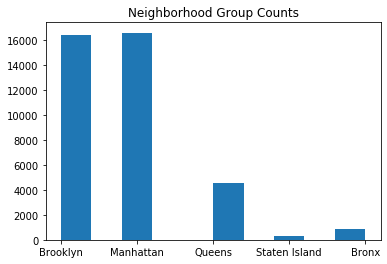

In [95]:
# How many neighbourhood_groups?
nyc2['neighbourhood_group'].value_counts()
plt.title("Neighborhood Group Counts")
plt.hist(nyc2['neighbourhood_group'])
plt.show()

In [101]:
# How many neighborhoods and counts (too many for a histogram)
nbs = pd.DataFrame(nyc2['neighbourhood'].value_counts())
nbs.describe()

,neighbourhood
count,218.000000
mean,178.077982
std,433.279136
min,1.000000
25%,8.000000
50%,27.000000
75%,125.750000
max,3163.000000


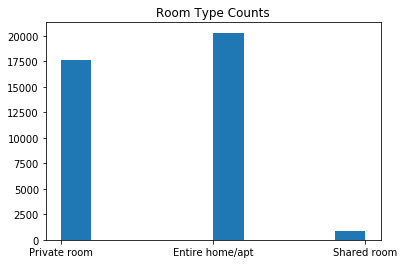

In [96]:
# How many room types?
nyc2['room_type'].value_counts()
plt.title("Room Type Counts")
plt.hist(nyc2['room_type'])
plt.show()

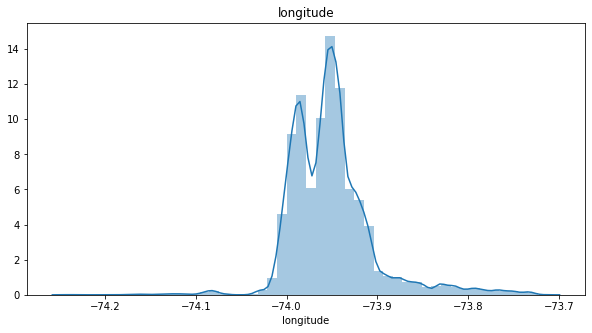

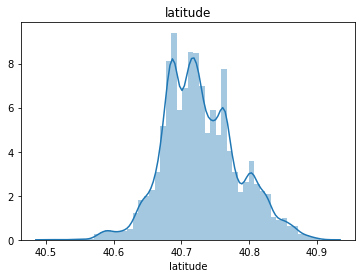

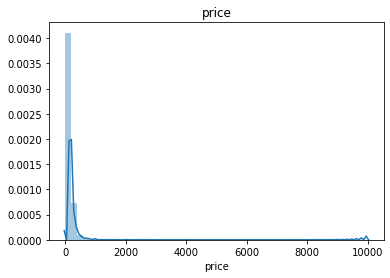

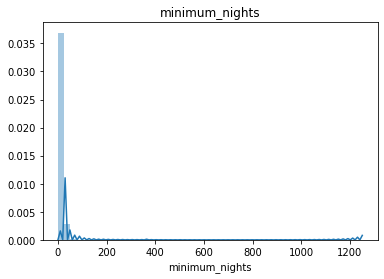

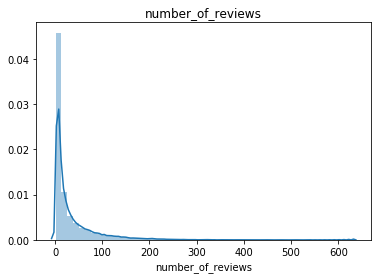

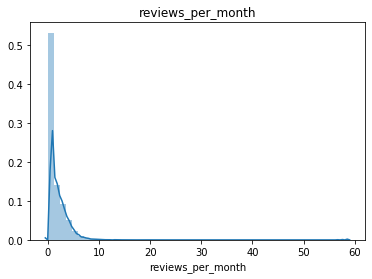

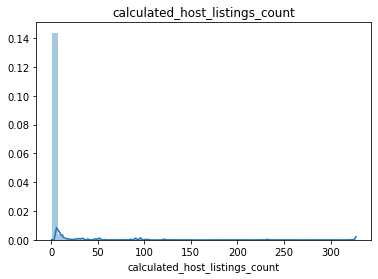

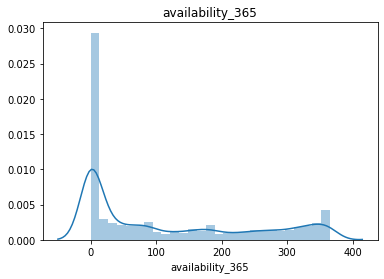

In [9]:
# Histogram for numeric columns
df = nyc2._get_numeric_data() # drop non-numeric columns
num_vars = df.drop(columns = ['id', 'host_id']) # drop id and host_id
plt.figure(figsize=(10,5))

for i, col in enumerate(num_vars.columns):
    plt.figure(i)
    plt.title(col)
    sns.distplot(num_vars[col])

In [10]:
# Comments: Quite a few variables are heavily skewed
# price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

In [97]:
# Closer look at price
# Group by price ranges (I chose 5, although you could probably group $1,000 to $10,000 into one)
under_100 = nyc2[nyc2.price <= 100]
_100_to_500 = nyc2[(nyc2.price <= 500) & (nyc2.price > 100)]
_500_to_1000 = nyc2[(nyc2.price <= 1000) & (nyc2.price > 500)]
_1000_to_5000 = nyc2[(nyc2.price <= 5000) & (nyc2.price > 1000)]
_5000_to_10000 = nyc2[(nyc2.price <= 10000) & (nyc2.price > 5000)]

below_100 = len(under_100)
_100_to_500_num = len(_100_to_500)
_500_to_1000_num = len(_500_to_1000)
_1000_to_5000_num = len(_1000_to_5000)
_5000_to_10000_num = len(_5000_to_10000)

print("There are " + str(below_100) + " listings below $100 a night.")
print("There are " + str(_100_to_500_num) + " listings between $100 and $500 a night.")
print("There are " + str(_500_to_1000_num) + " listings between $500 and $1,000 a night.")
print("There are " + str(_1000_to_5000_num) + " listings between $1000 and $5,000 a night.")
print("There are " + str(_5000_to_10000_num) + " listings between $5,000 and $10,000 a night.")

There are 19388 listings below $100 a night.
There are 18811 listings between $100 and $500 a night.
There are 515 listings between $500 and $1,000 a night.
There are 98 listings between $1000 and $5,000 a night.
There are 9 listings between $5,000 and $10,000 a night.


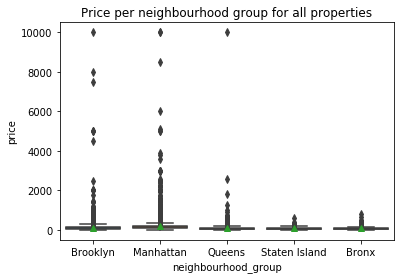

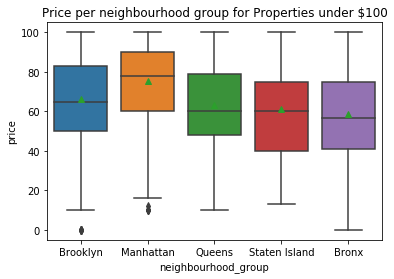

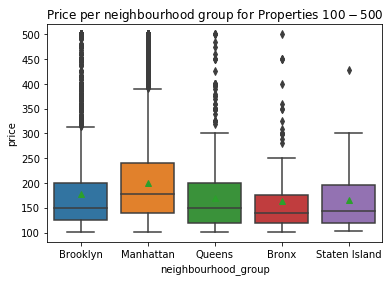

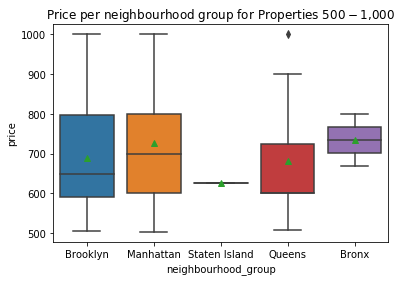

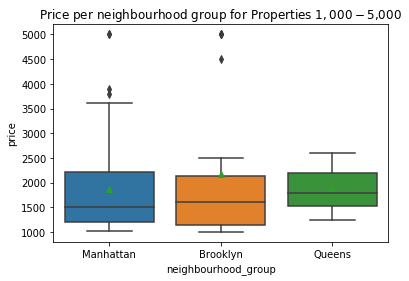

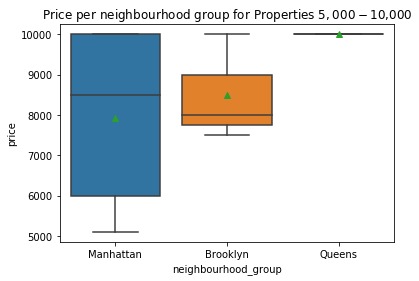

In [103]:
# Boxplots for the 5 different price point categories
x = 'neighbourhood_group'
y = 'price'

plt.title("Price per neighbourhood group for all properties")
sns.boxplot(x=x, y=y, data = nyc2, showmeans=True)
plt.show()

plt.title("Price per neighbourhood group for Properties under $100")
sns.boxplot(x=x, y=y, data = under_100, showmeans=True)
plt.show()

plt.title("Price per neighbourhood group for Properties $100-$500")
sns.boxplot(x=x, y=y, data = _100_to_500, showmeans=True)
plt.show()

plt.title("Price per neighbourhood group for Properties $500-$1,000")
sns.boxplot(x=x, y=y, data = _500_to_1000, showmeans=True)
plt.show()

plt.title("Price per neighbourhood group for Properties $1,000-$5,000")
sns.boxplot(x=x, y=y, data = _1000_to_5000, showmeans=True)
plt.show()

plt.title("Price per neighbourhood group for Properties $5,000-$10,000")
sns.boxplot(x=x, y=y, data = _5000_to_10000, showmeans=True)
plt.show()

In [98]:
# What is the best way to separate the prices?
under_300 = nyc2[nyc2.price <= 300]
over_300 = nyc2[nyc2.price > 300]

under_300_num = len(under_300)
over_300_num = len(over_300)

print("There are " + str(under_300_num) + " listings below $300 a night.")
print("There are " + str(over_300_num) + " listings over $300 a night.")

pct_under_300 = round((under_300_num / len(nyc2) * 100),2)
pct_over_300 = round((over_300_num / len(nyc2) * 100),2)

print(str(pct_under_300) + "% of listings are below $300 a night")
print(str(pct_over_300) + "% of listings are above $300 a night")

There are 36642 listings below $300 a night.
There are 2179 listings over $300 a night.
94.39% of listings are below $300 a night
5.61% of listings are above $300 a night


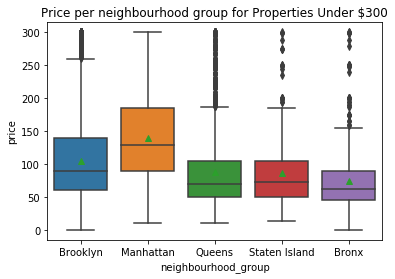

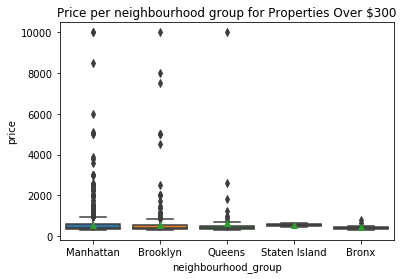

In [93]:
x = 'neighbourhood_group'
y = 'price'

plt.title("Price per neighbourhood group for Properties Under $300")
sns.boxplot(x=x, y=y, data = under_300, showmeans=True)
plt.show()

plt.title("Price per neighbourhood group for Properties Over $300")
sns.boxplot(x=x, y=y, data = over_300, showmeans=True)
plt.show()

In [ ]:
# Relationships between variables

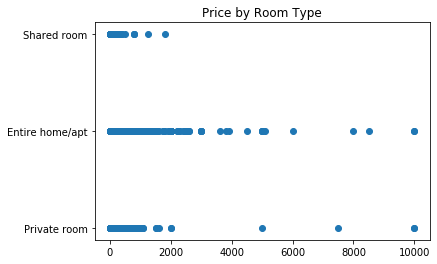

In [13]:
# Price x Room Type
plt.title('Price by Room Type')
plt.scatter(x=nyc2['price'], y = nyc2['room_type'])
plt.show()

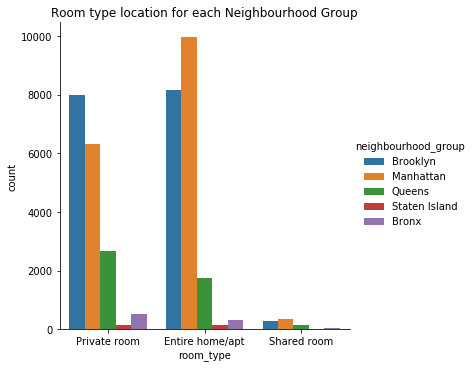

In [14]:
# Room type by Neighbourhood Group
title = 'Room type location for each Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=nyc2);
plt.title(title)
plt.show()

In [62]:
# Average Price per neighbourhood group
group = nyc2.groupby(by = 'neighbourhood_group').agg({'price': ['mean', 'std']}).rename(columns={'mean': 'ave_price', 'std':'std_price'})
ave_price = group['price'][['ave_price']]
ave_price = ave_price['ave_price']
ave_price = ave_price.reset_index()


std_price = group['price'][['std_price']]
std_price = std_price['std_price']
a = std_price.reset_index(drop='True')

group_df = pd.concat([ave_price,a], axis = 1)
group_df

,neighbourhood_group,ave_price,std_price
0,Bronx,79.558857,63.999121
1,Brooklyn,121.463289,169.887979
2,Manhattan,180.071596,226.474061
3,Queens,95.783683,168.395210
4,Staten Island,89.964968,65.864044


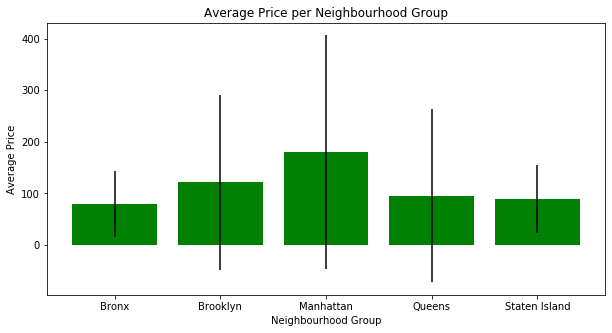

In [16]:
plt.figure(figsize=(10,5))
plt.bar(group_df.neighbourhood_group, group_df.ave_price, color='green', yerr=group_df.std_price)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.title("Average Price per Neighbourhood Group")
plt.show()

In [57]:
# Average Price per Room Type
group_rt = nyc2.groupby(by = 'room_type').agg({'price': ['mean', 'std']}).rename(columns={'mean': 'ave_price', 'std':'std_price'})
ave_price_rt = group_rt['price'][['ave_price']]
ave_price_rt = ave_price_rt['ave_price']
a = ave_price_rt.reset_index()
a

std_price_rt = group_rt['price'][['std_price']]
std_price_rt = std_price_rt['std_price']
b = std_price_rt.reset_index(drop = 'True')

group_rt_fin = pd.concat([a,b], axis = 1)
group_rt_fin

,room_type,ave_price,std_price
0,Entire home/apt,196.315929,223.700905
1,Private room,83.985272,142.279361
2,Shared room,63.213948,95.186458


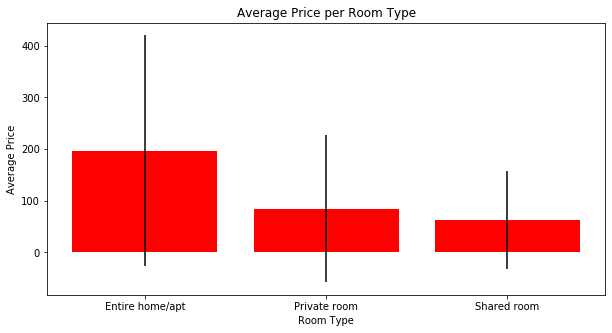

In [56]:
plt.figure(figsize=(10,5))
plt.bar(group_rt_fin.room_type, group_rt_fin.ave_price, color='red', yerr=group_rt_fin.std_price)
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Average Price per Room Type")
plt.show()

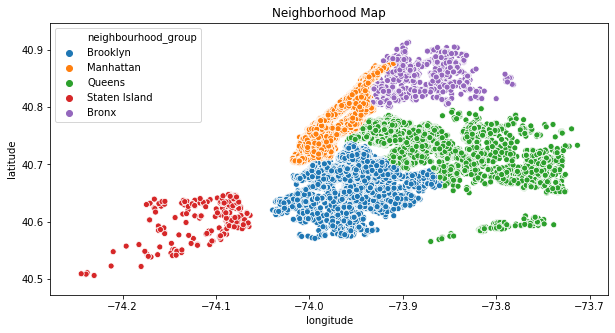

In [19]:
# Plot of neighbourhoods
plt.figure(figsize=(10,5))
title = "Neighborhood Map"
sns.scatterplot(nyc2.longitude,nyc2.latitude,hue=nyc2.neighbourhood_group).set_title(title)
plt.show()

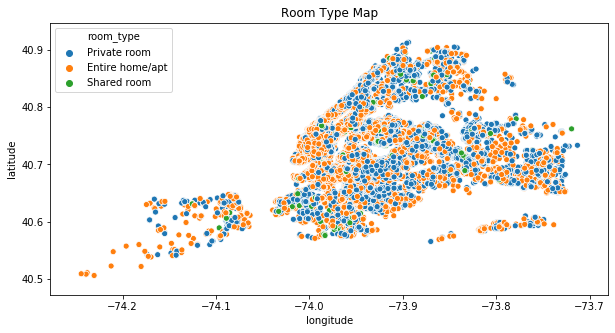

In [20]:
# Plot of room types
plt.figure(figsize=(10,5))
title = "Room Type Map"
sns.scatterplot(nyc2.longitude,nyc2.latitude,hue=nyc2.room_type).set_title(title)
plt.show()

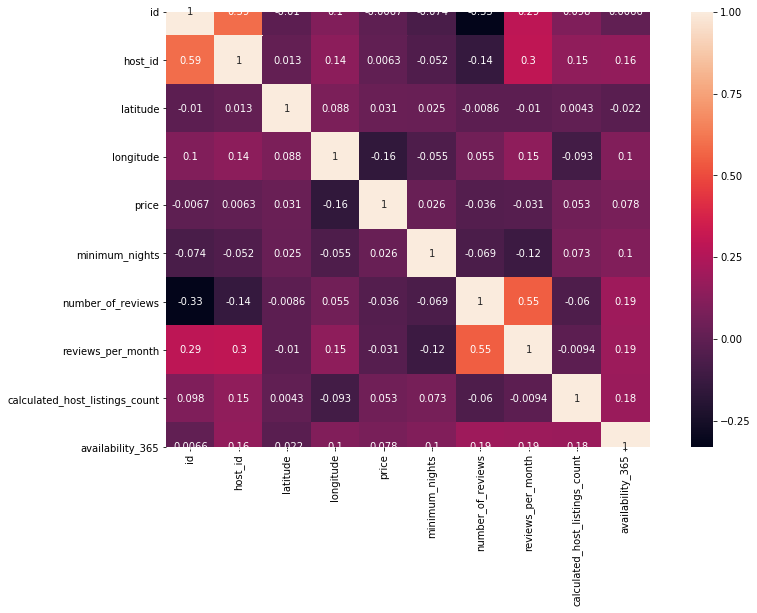

In [67]:
# Correlation heat map
corrmat = nyc2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmat, annot = True, fmt='.2g', square = True)
plt.show()

In [ ]:
""" 
Comments: Price can be broken down into two categories, under $300 and over $300. The significant variation in 
price will make it challenging to get a good prediction. Additionally, many numerical variables showed some heavy skew,
indicating that a log transformation may be best. 

Other comments: Any listing where the price = $0 should be removed since that is likely a mistake, or the individual
does not want it listed. Minimum_nights is another variable that warrants consideration. For the sake of our analysis
we are going to limit the minimum stay to under a month, since anything above is for individuals wanting a long time 
stay. 

"""